In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import LogNorm, PowerNorm, SymLogNorm, BoundaryNorm
from pathlib import Path

# Preparing plot with variable font sizes
TICK_FONTSIZE = 16
TITLE_FONTSIZE = 20
LEGEND_FONTSIZE = 16
DPI = 300

RESULT_PATH = Path("../assets/result/")
FIGURE_PATH =  Path("../assets/result/figure")

# Homogeneous Networks

In [2]:
with open(RESULT_PATH / "same_structure.csv", "r", encoding="utf-8") as file:
    df = pd.read_csv(file, encoding="utf-8")
df

,type,n,k,gamma,seq,MDS1,MDS2,pre_intersection,intersection,pre_union,union
0,ER+ER,1000,1.0,NaN,0,645,650,416,436,879,859
1,ER+ER,1000,1.0,NaN,1,645,650,416,436,879,859
2,ER+ER,1000,1.0,NaN,2,645,650,419,436,876,859
3,ER+ER,1000,1.0,NaN,3,645,650,415,436,880,859
4,ER+ER,1000,1.0,NaN,4,645,650,414,436,881,859
...,...,...,...,...,...,...,...,...,...,...,...
1325,SF+SF_k=3.0,1000,3.0,5.0,5,339,343,113,186,569,496
1326,SF+SF_k=3.0,1000,3.0,5.0,6,339,343,118,186,564,496
1327,SF+SF_k=3.0,1000,3.0,5.0,7,339,343,126,186,556,496
1328,SF+SF_k=3.0,1000,3.0,5.0,8,339,343,120,186,562,496


In [3]:
# Filtering data for subgraph types: ER and SF, explicitly creating copies
er_data = df[df['type'] == 'ER+ER'].copy()
sf_data_gamma = df[df['type'] == 'SF+SF_gamma=3.0'].copy()
sf_data_k = df[df['type'] == 'SF+SF_k=3.0'].copy()

# Calculating y-values
# Now these assignments are clearly on copies, so the warning shouldn't appear
er_data['baseline'] = er_data['pre_union'] / er_data['n']
er_data['n_D'] = er_data['union'] / er_data['n']
er_data['n_D1'] = er_data['MDS1'] / er_data['n']
er_data['n_D2'] = er_data['MDS2'] / er_data['n']

sf_data_gamma['baseline'] = sf_data_gamma['pre_union'] / sf_data_gamma['n']
sf_data_gamma['n_D'] = sf_data_gamma['union'] / sf_data_gamma['n']
sf_data_gamma['n_D1'] = sf_data_gamma['MDS1'] / sf_data_gamma['n']
sf_data_gamma['n_D2'] = sf_data_gamma['MDS2'] / sf_data_gamma['n']

sf_data_k['baseline'] = sf_data_k['pre_union'] / sf_data_k['n']
sf_data_k['n_D'] = sf_data_k['union'] / sf_data_k['n']
sf_data_k['n_D1'] = sf_data_k['MDS1'] / sf_data_k['n']
sf_data_k['n_D2'] = sf_data_k['MDS2'] / sf_data_k['n']

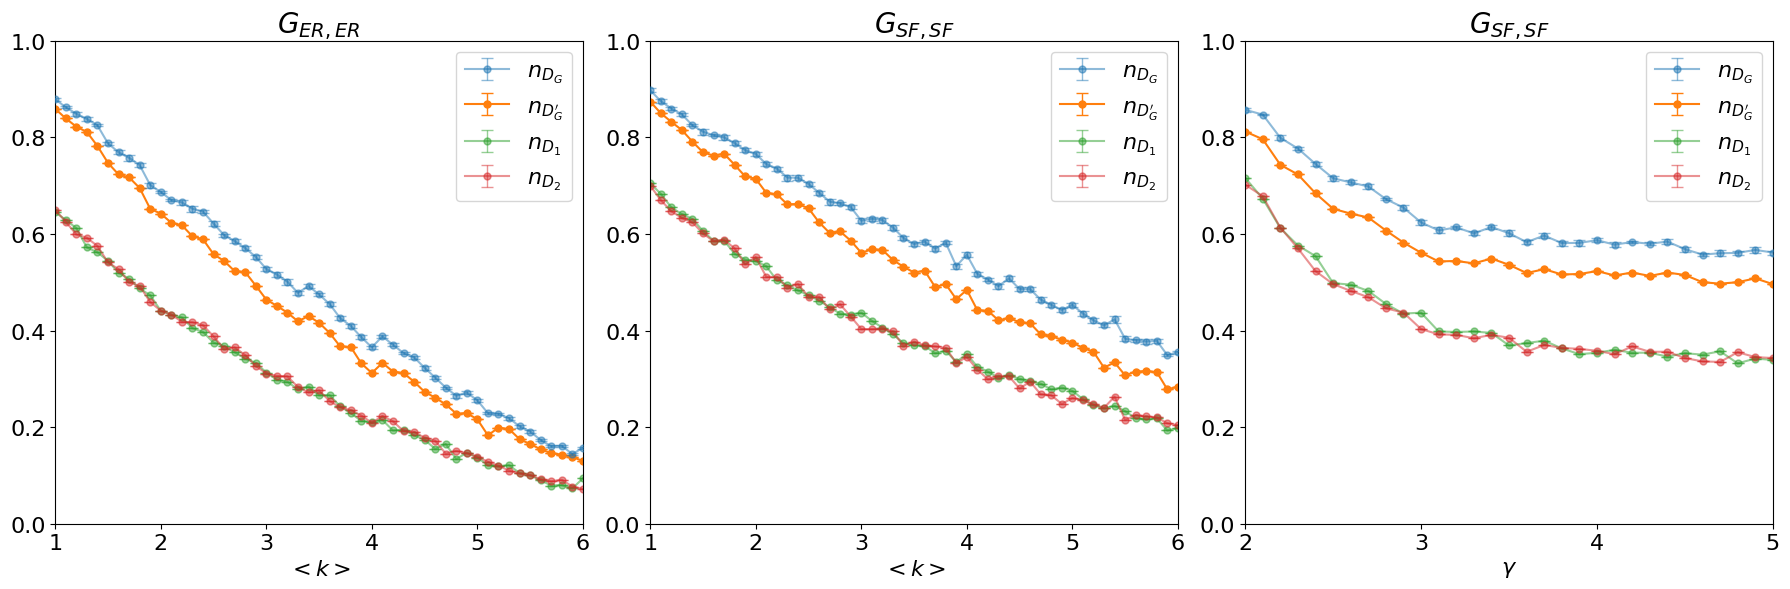

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(6 * 3, 6))

# ER Subgraph
for column in ['baseline', 'n_D', 'n_D1', 'n_D2']:
    means = er_data.groupby('k')[column].mean()
    stds = er_data.groupby('k')[column].std()
    if column in ['n_D1', 'n_D2']:
        ax[0].errorbar(means.index, means, yerr=stds, fmt='-o', label=r'$n_{D_1}$' if column == 'n_D1' else r'$n_{D_2}$',
                       markersize=5, elinewidth=1, capsize=4, capthick=1,
                       alpha=0.5, zorder=1)
    else:
        if column == 'baseline':
            ax[0].errorbar(means.index, means, yerr=stds, fmt='-o', label=r'$n_{D_G}$',
                    markersize=5, elinewidth=1, capsize=4, capthick=1,
                    alpha=0.5, zorder=99)
        else:
            ax[0].errorbar(means.index, means, yerr=stds, fmt='-o', label=r"$n_{D_G'}$",
                    markersize=5, elinewidth=1, capsize=4, capthick=1)

ax[0].set_title(r'$G_{ER, ER}$', fontsize=TITLE_FONTSIZE)
ax[0].set_xlabel(r'$<k>$', fontsize=TICK_FONTSIZE)
ax[0].tick_params(axis='x', labelsize=TICK_FONTSIZE)
ax[0].tick_params(axis='y', labelsize=TICK_FONTSIZE)
ax[0].set_xlim(1, 6)
ax[0].set_ylim(0, 1)
ax[0].legend(fontsize=LEGEND_FONTSIZE)

# SF Subgraph gamma fixed
for column in ['baseline', 'n_D', 'n_D1', 'n_D2']:
    means = sf_data_gamma.groupby('k')[column].mean()
    stds = sf_data_gamma.groupby('k')[column].std()
    if column in ['n_D1', 'n_D2']:
        ax[1].errorbar(means.index, means, yerr=stds, fmt='-o', label=r'$n_{D_1}$' if column == 'n_D1' else r'$n_{D_2}$',
                       markersize=5, elinewidth=1, capsize=4, capthick=1,
                       alpha=0.5, zorder=1)
    else:
        if column == 'baseline':
            ax[1].errorbar(means.index, means, yerr=stds, fmt='-o', label=r'$n_{D_G}$',
                    markersize=5, elinewidth=1, capsize=4, capthick=1,
                    alpha=0.5, zorder=99)
        else:
            ax[1].errorbar(means.index, means, yerr=stds, fmt='-o', label=r"$n_{D_G'}$",
                    markersize=5, elinewidth=1, capsize=4, capthick=1)

ax[1].set_title(r'$G_{SF, SF}$', fontsize=TITLE_FONTSIZE)
ax[1].set_xlabel(r'$<k>$', fontsize=TICK_FONTSIZE)
ax[1].tick_params(axis='x', labelsize=TICK_FONTSIZE)
ax[1].tick_params(axis='y', labelsize=TICK_FONTSIZE)
ax[1].set_xlim(1, 6)
ax[1].set_ylim(0, 1)
ax[1].legend(fontsize=LEGEND_FONTSIZE)


# SF Subgraph k fixed
for column in ['baseline', 'n_D', 'n_D1', 'n_D2']:
    means = sf_data_k.groupby('gamma')[column].mean()
    stds = sf_data_k.groupby('gamma')[column].std()
    if column in ['n_D1', 'n_D2']:
        ax[2].errorbar(means.index, means, yerr=stds, fmt='-o', label=r'$n_{D_1}$' if column == 'n_D1' else r'$n_{D_2}$',
                       markersize=5, elinewidth=1, capsize=4, capthick=1,
                       alpha=0.5, zorder=1)
    else:
        if column == 'baseline':
            ax[2].errorbar(means.index, means, yerr=stds, fmt='-o', label=r'$n_{D_G}$',
                    markersize=5, elinewidth=1, capsize=4, capthick=1,
                    alpha=0.5, zorder=99)
        else:
            ax[2].errorbar(means.index, means, yerr=stds, fmt='-o', label=r"$n_{D_G'}$",
                    markersize=5, elinewidth=1, capsize=4, capthick=1)

ax[2].set_title(r'$G_{SF, SF}$', fontsize=TITLE_FONTSIZE)
ax[2].set_xlabel(r'$\gamma$', fontsize=TICK_FONTSIZE)
ax[2].tick_params(axis='x', labelsize=TICK_FONTSIZE)
ax[2].tick_params(axis='y', labelsize=TICK_FONTSIZE)
ax[2].set_xlim(2, 5)
ax[2].set_xticks([2, 3, 4, 5])
ax[2].set_ylim(0, 1)
ax[2].legend(fontsize=LEGEND_FONTSIZE)

plt.tight_layout()

plt.savefig(FIGURE_PATH / "same_structure.svg", dpi=DPI)

plt.show()

# Heterogeneous Networks

In [5]:
with open(RESULT_PATH / "old" / "same_structure_diff_k_or_gamma.csv", "r", encoding="utf-8") as file:
    df = pd.read_csv(file, encoding="utf-8")
df

,type,n,k1,k2,gamma1,gamma2,MDS1,MDS2,pre_intersection,intersection,pre_union,union
0,ER+ER,1000,1.0,1.0,NaN,NaN,451,472,203,259,720,664
1,ER+ER,1000,1.0,1.1,NaN,NaN,451,418,188,239,681,630
2,ER+ER,1000,1.0,1.2,NaN,NaN,451,380,169,217,662,614
3,ER+ER,1000,1.0,1.3,NaN,NaN,451,364,171,217,644,598
4,ER+ER,1000,1.0,1.4,NaN,NaN,451,352,146,204,657,599
...,...,...,...,...,...,...,...,...,...,...,...,...
3557,BA+BA,1000,3.0,3.0,5.0,4.6,102,108,14,38,196,172
3558,BA+BA,1000,3.0,3.0,5.0,4.7,102,107,15,39,194,170
3559,BA+BA,1000,3.0,3.0,5.0,4.8,102,107,15,48,194,161
3560,BA+BA,1000,3.0,3.0,5.0,4.9,102,90,7,31,185,161


In [22]:
heatmap_type = {
    'n_D0': r'$|D_0|$',
    'n_D': r'$|D|$',
    'OR_absolute': r'$\frac{\Delta |D|}{|N|}$',
    'OR_relative': r'$\frac{\Delta |D|}{|D_0|}$'
}

In [7]:
# Calculating n_D for the heatmap
df['n_D0'] = df['pre_union'] / df['n']
df['n_D'] = df['union'] / df['n']
df['OR_absolute'] = (df['pre_union'] - df['union']) / df['n']
df['OR_relative'] = (df['pre_union'] - df['union']) / df['pre_union']

# Separate the dataset into ER and BA subgraphs
er_data_heatmap = df[df['type'] == 'ER+ER']
sf_data_heatmap = df[df['type'] == 'BA+BA']

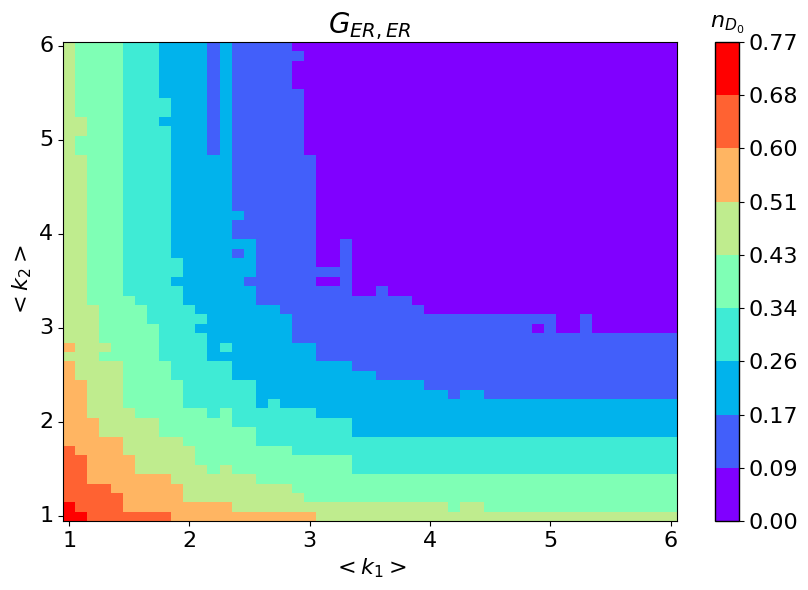

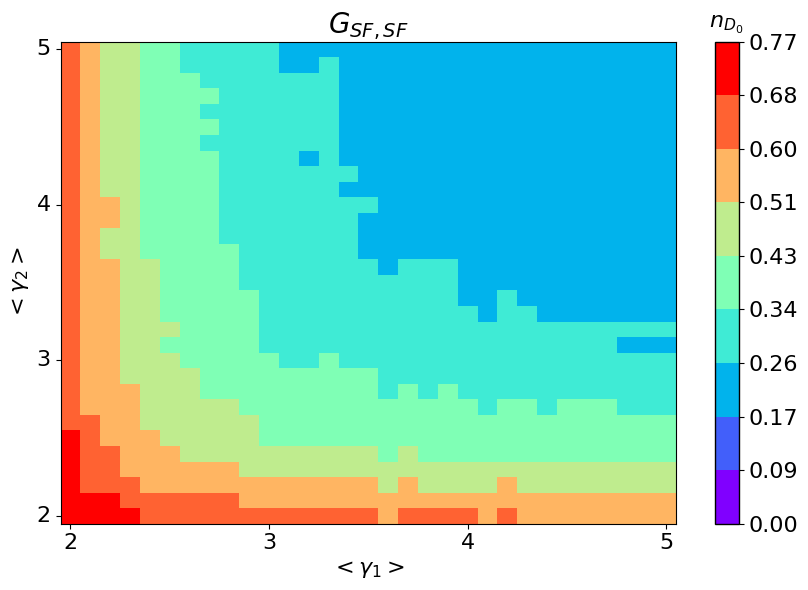

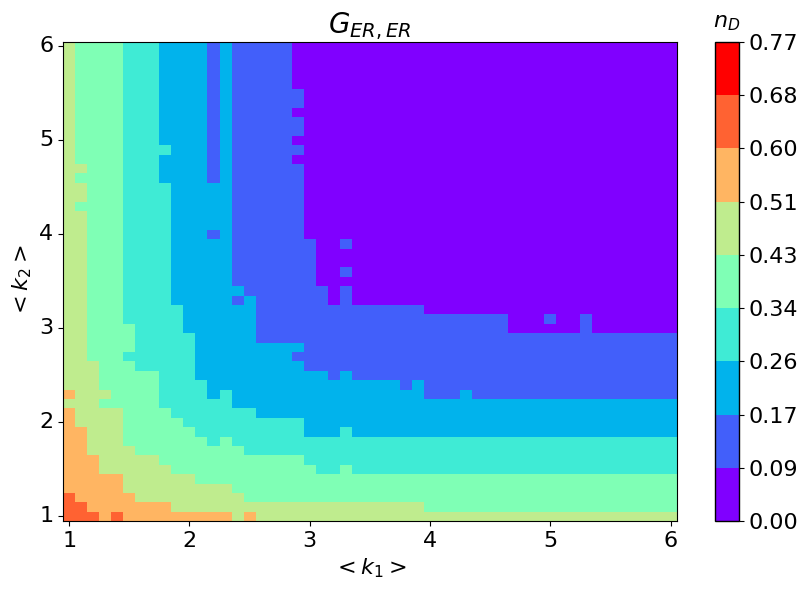

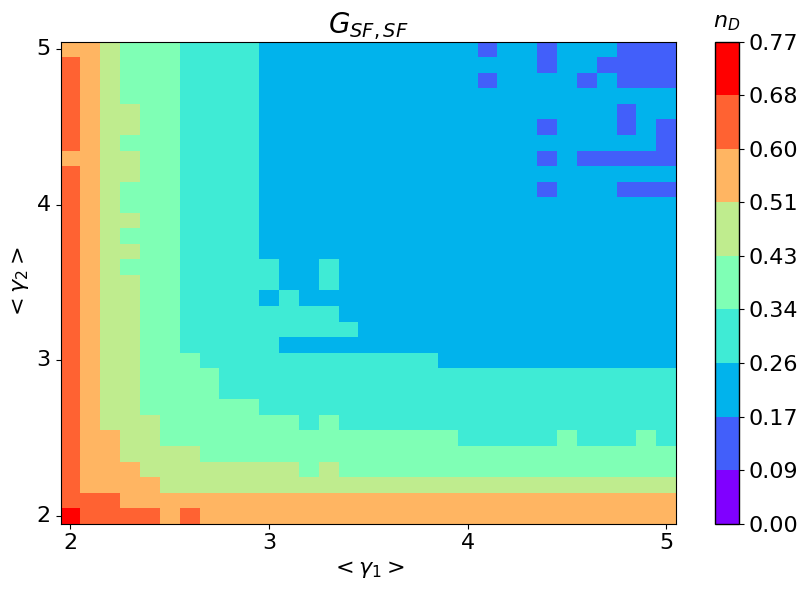

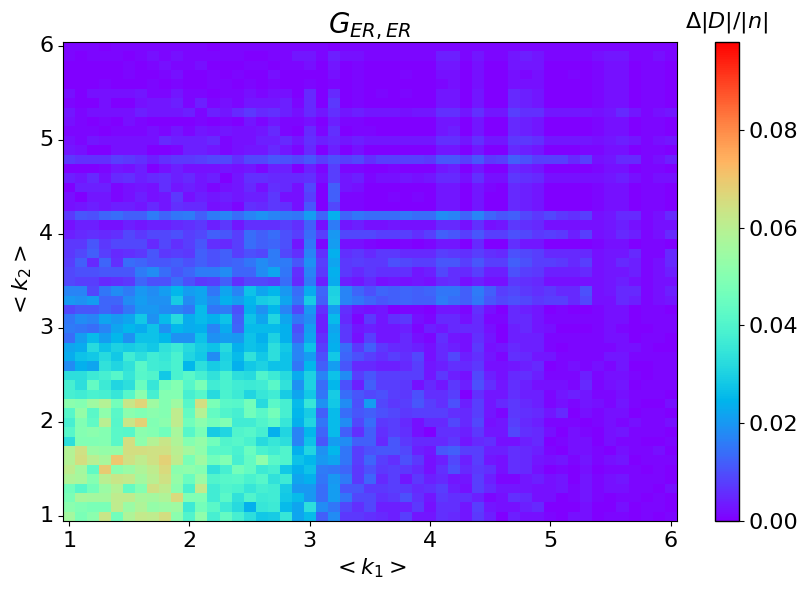

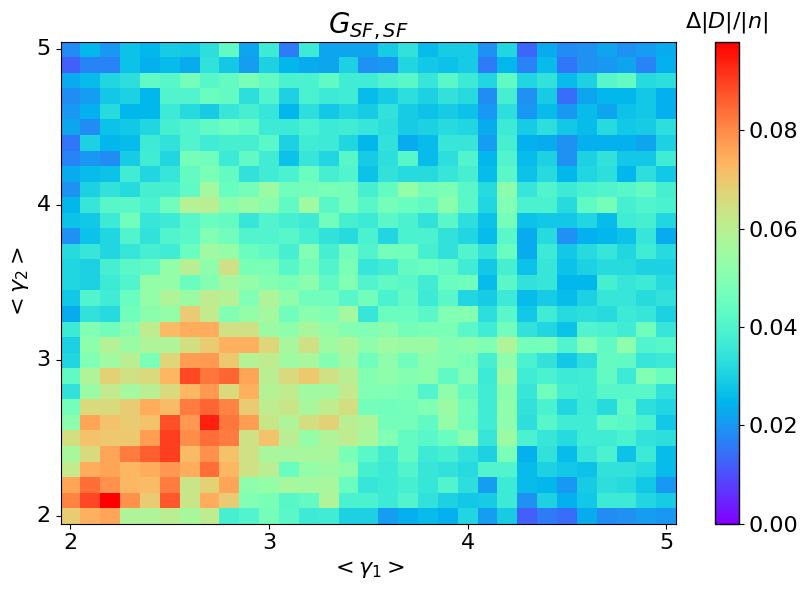

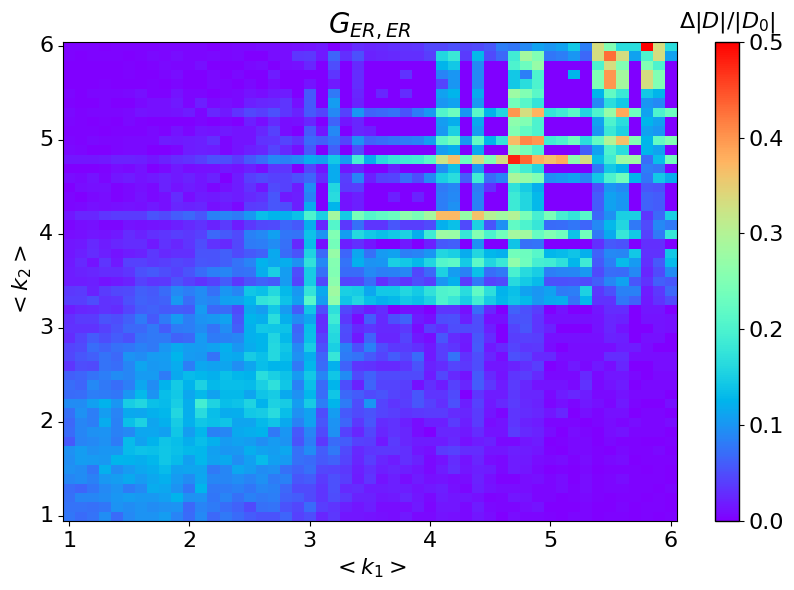

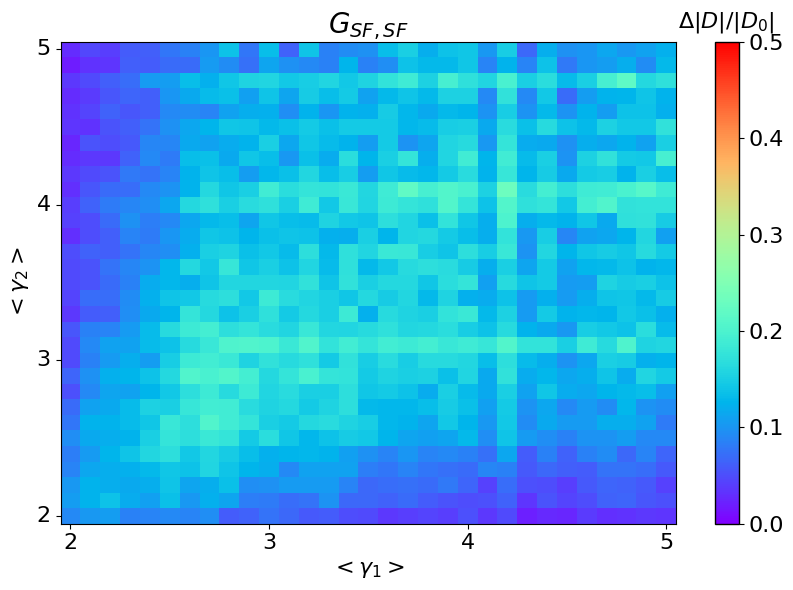

In [37]:
for column_name, colorbar_label in heatmap_type.items():
    er_pivot = er_data_heatmap.pivot(index="k2", columns="k1", values=column_name)
    sf_pivot = sf_data_heatmap.pivot(index="gamma2", columns="gamma1", values=column_name)
    # ba_pivot = ba_data_heatmap.pivot(index="k2", columns="k1", values=column_name)
    for pivot_table, title in zip([er_pivot, sf_pivot], [r'$G_{ER, ER}$', r'$G_{SF, SF}$']):
        plt.figure(figsize=(8.5, 6))
        if column_name == 'OR_absolute':
            ax = sns.heatmap(pivot_table, cmap="rainbow", vmin=0, vmax=df['OR_absolute'].max())
        elif column_name == 'OR_relative':
            ax = sns.heatmap(pivot_table, cmap="rainbow", vmin=0, vmax=df['OR_relative'].max())
        else:
            # ax = sns.heatmap(pivot_table, norm=LogNorm(), cmap="rainbow", vmin=0, vmax=df['n_D0'].max())
            # ax = sns.heatmap(pivot_table, norm=PowerNorm(0.5), cmap="rainbow", vmin=0, vmax=df['n_D0'].max())
            # ax = sns.heatmap(pivot_table, norm=SymLogNorm(df['n_D0'].max() / 2), cmap="rainbow", vmin=0, vmax=df['n_D0'].max())
            cmap = plt.cm.rainbow
            ax = sns.heatmap(pivot_table, norm=BoundaryNorm(np.round(np.linspace(0, df['n_D0'].max(), 10), 2), cmap.N, clip=True), cmap=cmap, vmin=0, vmax=df['n_D0'].max())
        
        plt.title(title, fontsize=TITLE_FONTSIZE)
        
        plt.xlabel(r'$<k_1>$' if title == r'$G_{ER, ER}$' else r'$<\gamma_1>$', fontsize=TICK_FONTSIZE)
        plt.ylabel(r'$<k_2>$' if title == r'$G_{ER, ER}$' else r'$<\gamma_2>$', fontsize=TICK_FONTSIZE)
        # plt.xlabel(r'$<k_1>$', fontsize=TICK_FONTSIZE)
        # plt.ylabel(r'$<k_2>$', fontsize=TICK_FONTSIZE)
        
        tick_positions = np.arange(0.5, len(pivot_table.columns) + 0.5, 10)
        tick_labels = np.round(tick_positions / 10 + (1 if title == r'$G_{ER, ER}$' else 2), 0).astype(int)
        
        plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=0, fontsize=LEGEND_FONTSIZE)
        plt.yticks(ticks=tick_positions, labels=tick_labels, fontsize=LEGEND_FONTSIZE)
        plt.tick_params(axis='x', labelsize=TICK_FONTSIZE)
        plt.tick_params(axis='y', labelsize=TICK_FONTSIZE)
        plt.gca().invert_yaxis()

        for _, spine in ax.spines.items():
            spine.set_visible(True)
            spine.set_edgecolor('black')

        cbar = ax.collections[0].colorbar
        cbar.ax.set_title(colorbar_label, pad=10, fontsize=LEGEND_FONTSIZE)
        cbar.ax.tick_params(labelsize=TICK_FONTSIZE)
        cbar.outline.set_visible(True)
        cbar.outline.set_edgecolor('black')
        cbar.outline.set_linewidth(1)

        plt.tight_layout()

        plt.savefig(FIGURE_PATH / f"same_structure_diff_property_{column_name}_{title}.svg", dpi=DPI)
        
        plt.show()

# Hybrid Networks

In [11]:
with open(RESULT_PATH / "diff_structure_diff_k.csv", "r", encoding="utf-8") as file:
    df = pd.read_csv(file, encoding="utf-8")
df

,type,n,k1,k2,gamma1,gamma2,MDS1,MDS2,pre_intersection,intersection,pre_union,union
0,ER+SF,1000,1.0,1.0,NaN,3.0,645,705,470,490,880,860
1,ER+SF,1000,1.0,1.1,NaN,3.0,645,683,440,468,888,860
2,ER+SF,1000,1.0,1.2,NaN,3.0,645,655,410,437,890,863
3,ER+SF,1000,1.0,1.3,NaN,3.0,645,641,416,436,870,850
4,ER+SF,1000,1.0,1.4,NaN,3.0,645,631,409,431,867,845
...,...,...,...,...,...,...,...,...,...,...,...,...
2596,ER+SF,1000,6.0,5.6,NaN,3.0,94,218,22,44,290,268
2597,ER+SF,1000,6.0,5.7,NaN,3.0,94,216,24,47,286,263
2598,ER+SF,1000,6.0,5.8,NaN,3.0,94,218,23,49,289,263
2599,ER+SF,1000,6.0,5.9,NaN,3.0,94,193,21,47,266,240


In [12]:
# Calculating n_D for the heatmap
df['n_D0'] = df['pre_union'] / df['n']
df['n_D'] = df['union'] / df['n']
df['OR_absolute'] = (df['pre_union'] - df['union']) / df['n']
df['OR_relative'] = (df['pre_union'] - df['union']) / df['pre_union']

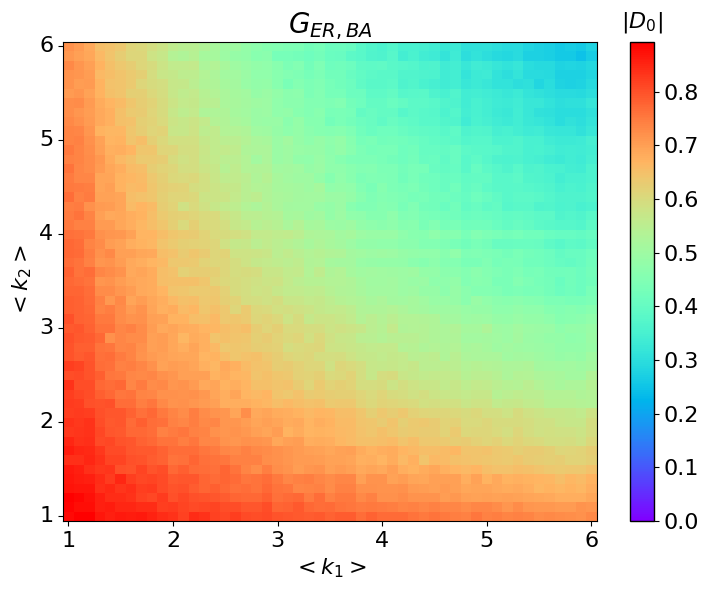

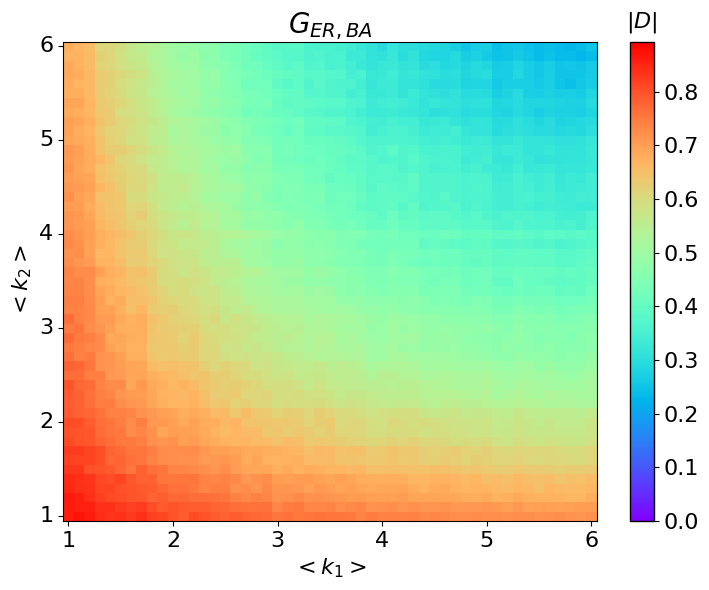

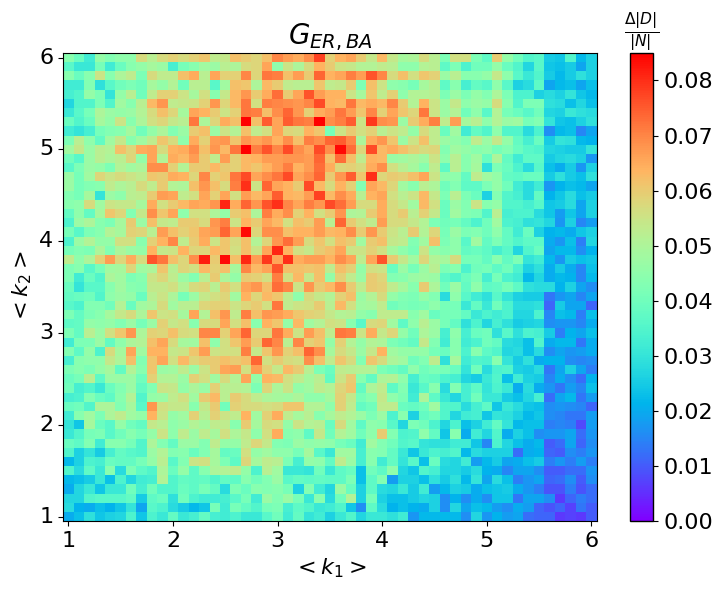

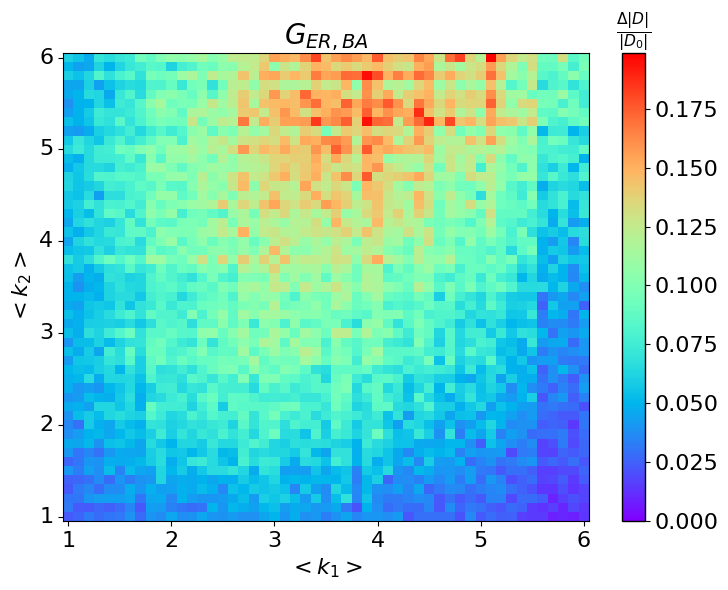

In [23]:
for column_name, colorbar_label in heatmap_type.items():
    pivot_table = df.pivot(index="k2", columns="k1", values=column_name)
    plt.figure(figsize=(7.5, 6))
    if column_name == 'OR_absolute':
        ax = sns.heatmap(pivot_table, cmap="rainbow", vmin=0)
    elif column_name == 'OR_relative':
        ax = sns.heatmap(pivot_table, cmap="rainbow", vmin=0)
    else:
        ax = sns.heatmap(pivot_table, cmap="rainbow", vmin=0, vmax=df['n_D0'].max())

    plt.title(r'$G_{ER, BA}$', fontsize=TITLE_FONTSIZE)
    plt.xlabel(r'$<k_1>$', fontsize=TICK_FONTSIZE)
    plt.ylabel(r'$<k_2>$', fontsize=TICK_FONTSIZE)

    x_tick_positions = np.arange(0.5, len(pivot_table.columns) + 0.5, 10)
    x_tick_labels = np.round(x_tick_positions / 10 + 1 , 0).astype(int)
    plt.xticks(ticks=x_tick_positions, labels=x_tick_labels, rotation=0, fontsize=LEGEND_FONTSIZE)

    y_tick_positions = np.arange(0.5, len(pivot_table.index) + 0.5, 10)
    y_tick_labels = np.round(y_tick_positions / 10 + 1, 0).astype(int)
    plt.yticks(ticks=y_tick_positions, labels=y_tick_labels, fontsize=LEGEND_FONTSIZE)

    plt.tick_params(axis='x', labelsize=TICK_FONTSIZE)
    plt.tick_params(axis='y', labelsize=TICK_FONTSIZE)

    plt.gca().invert_yaxis()

    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_edgecolor('black')

    cbar = ax.collections[0].colorbar
    cbar.ax.set_title(colorbar_label, pad=10, fontsize=LEGEND_FONTSIZE)
    cbar.ax.tick_params(labelsize=TICK_FONTSIZE)
    cbar.outline.set_visible(True)
    cbar.outline.set_edgecolor('black')
    cbar.outline.set_linewidth(1)

    plt.tight_layout()

    plt.savefig(FIGURE_PATH / f'diff_structure_{column_name}.svg', dpi=DPI)
    
    plt.show()

In [25]:
with open(RESULT_PATH / "diff_structure_diff_k_or_gamma.csv", "r", encoding="utf-8") as file:
    df = pd.read_csv(file, encoding="utf-8")
df

,type,n,k1,k2,gamma1,gamma2,MDS1,MDS2,pre_intersection,intersection,pre_union,union
0,ER+SF,1000,1.0,1.0,NaN,2.0,645,833,535,550,943,928
1,ER+SF,1000,1.0,1.0,NaN,2.1,645,830,535,554,940,921
2,ER+SF,1000,1.0,1.0,NaN,2.2,645,804,518,537,931,912
3,ER+SF,1000,1.0,1.0,NaN,2.3,645,782,502,517,925,910
4,ER+SF,1000,1.0,1.0,NaN,2.4,645,771,501,522,915,894
...,...,...,...,...,...,...,...,...,...,...,...,...
1576,ER+SF,1000,6.0,6.0,NaN,4.6,94,102,14,24,182,172
1577,ER+SF,1000,6.0,6.0,NaN,4.7,94,107,12,33,189,168
1578,ER+SF,1000,6.0,6.0,NaN,4.8,94,112,6,17,200,189
1579,ER+SF,1000,6.0,6.0,NaN,4.9,94,95,6,15,183,174


In [26]:
# Calculating n_D for the heatmap
df['n_D0'] = df['pre_union'] / df['n']
df['n_D'] = df['union'] / df['n']
df['OR_absolute'] = (df['pre_union'] - df['union']) / df['n']
df['OR_relative'] = (df['pre_union'] - df['union']) / df['pre_union']

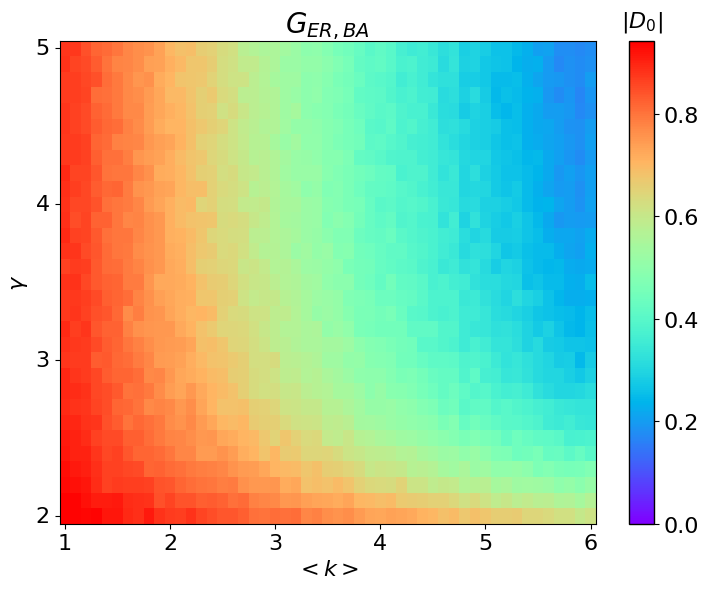

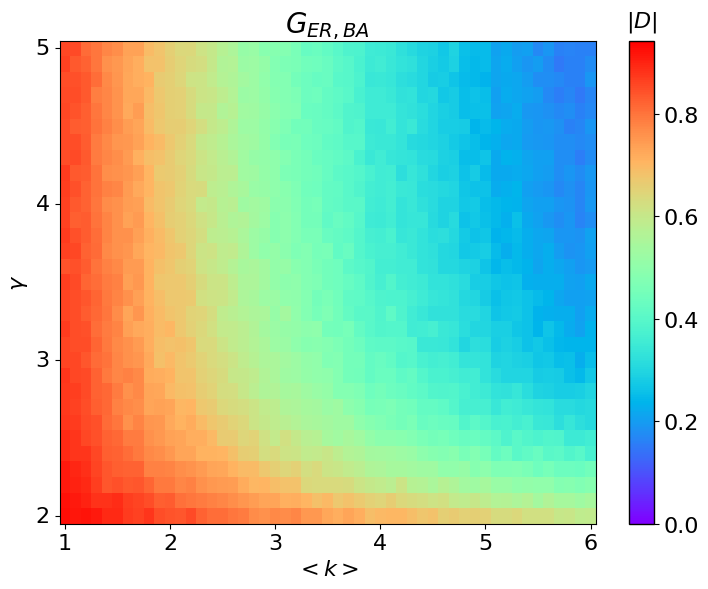

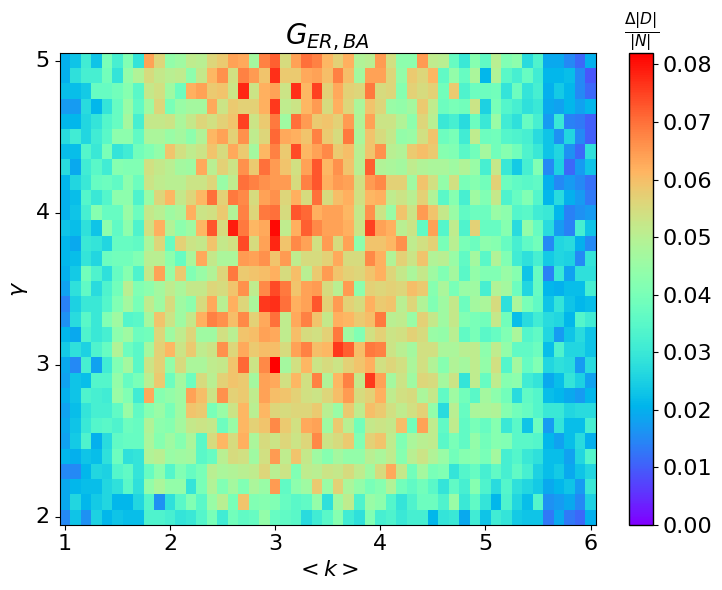

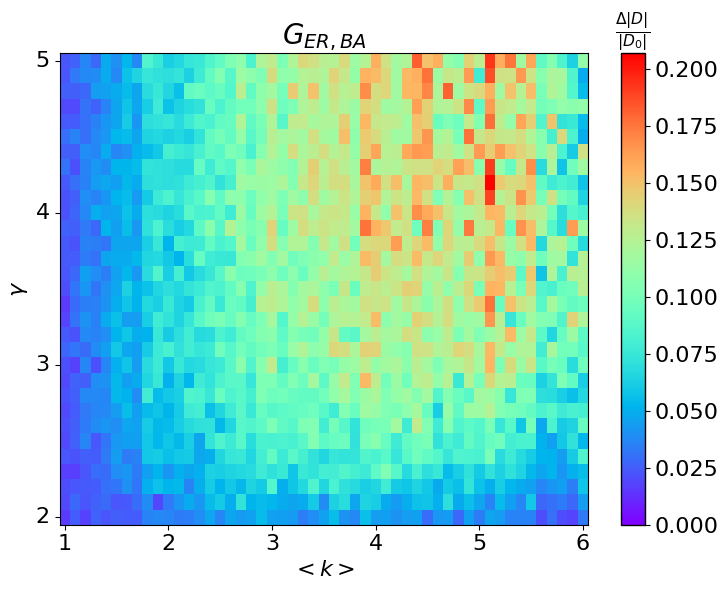

In [28]:
for column_name, colorbar_label in heatmap_type.items():
    pivot_table = df.pivot(index="gamma2", columns="k1", values=column_name)
    plt.figure(figsize=(7.5, 6))
    if column_name == 'OR_absolute':
        ax = sns.heatmap(pivot_table, cmap="rainbow", vmin=0)
    elif column_name == 'OR_relative':
        ax = sns.heatmap(pivot_table, cmap="rainbow", vmin=0)
    else:
        ax = sns.heatmap(pivot_table, cmap="rainbow", vmin=0, vmax=df['n_D0'].max())

    plt.title(r'$G_{ER, BA}$', fontsize=TITLE_FONTSIZE)
    plt.xlabel(r'$<k>$', fontsize=TICK_FONTSIZE)
    plt.ylabel(r'$\gamma$', fontsize=TICK_FONTSIZE)

    x_tick_positions = np.arange(0.5, len(pivot_table.columns) + 0.5, 10)
    x_tick_labels = np.round(x_tick_positions / 10 + 1 , 0).astype(int)
    plt.xticks(ticks=x_tick_positions, labels=x_tick_labels, rotation=0, fontsize=LEGEND_FONTSIZE)

    y_tick_positions = np.arange(0.5, len(pivot_table.index) + 0.5, 10)
    y_tick_labels = np.round(y_tick_positions / 10 + 2, 0).astype(int)
    plt.yticks(ticks=y_tick_positions, labels=y_tick_labels, fontsize=LEGEND_FONTSIZE)

    plt.tick_params(axis='x', labelsize=TICK_FONTSIZE)
    plt.tick_params(axis='y', labelsize=TICK_FONTSIZE)

    plt.gca().invert_yaxis()

    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_edgecolor('black')

    cbar = ax.collections[0].colorbar
    cbar.ax.set_title(colorbar_label, pad=10, fontsize=LEGEND_FONTSIZE)
    cbar.ax.tick_params(labelsize=TICK_FONTSIZE)
    cbar.outline.set_visible(True)
    cbar.outline.set_edgecolor('black')
    cbar.outline.set_linewidth(1)

    plt.tight_layout()

    plt.savefig(FIGURE_PATH / f'diff_structure_{column_name}.svg', dpi=DPI)
    
    plt.show()

In [148]:
df_filtered_2 = df[(df['gamma2'] == 3)]
df_filtered_2

,type,n,k1,k2,gamma1,gamma2,MDS1,MDS2,pre_intersection,intersection,pre_union,union,n_D0,n_D,OR_absolute,OR_relative
10,ER+BA,1000,1.0,1.0,NaN,3.0,451,538,238,293,751,696,0.751,0.696,55,0.073236
41,ER+BA,1000,1.1,1.1,NaN,3.0,425,517,223,267,719,675,0.719,0.675,44,0.061196
72,ER+BA,1000,1.2,1.2,NaN,3.0,387,477,190,242,674,622,0.674,0.622,52,0.077151
103,ER+BA,1000,1.3,1.3,NaN,3.0,359,465,161,228,663,596,0.663,0.596,67,0.101056
134,ER+BA,1000,1.4,1.4,NaN,3.0,352,439,166,214,625,577,0.625,0.577,48,0.076800
165,ER+BA,1000,1.5,1.5,NaN,3.0,302,424,140,192,586,534,0.586,0.534,52,0.088737
196,ER+BA,1000,1.6,1.6,NaN,3.0,289,415,122,178,582,526,0.582,0.526,56,0.096220
227,ER+BA,1000,1.7,1.7,NaN,3.0,276,372,108,173,540,475,0.540,0.475,65,0.120370
258,ER+BA,1000,1.8,1.8,NaN,3.0,254,368,97,152,525,470,0.525,0.470,55,0.104762
289,ER+BA,1000,1.9,1.9,NaN,3.0,234,342,82,139,494,437,0.494,0.437,57,0.115385


In [149]:
df_filtered_2['baseline'] = df_filtered_2['pre_union'] / df_filtered_2['n']
df_filtered_2['n_D'] = df_filtered_2['union'] / df_filtered_2['n']
df_filtered_2['n_D1'] = df_filtered_2['MDS1'] / df_filtered_2['n']
df_filtered_2['n_D2'] = df_filtered_2['MDS2'] / df_filtered_2['n']

C:\Users\Niji\AppData\Local\Temp\ipykernel_19552\3630472900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_2['baseline'] = df_filtered_2['pre_union'] / df_filtered_2['n']
C:\Users\Niji\AppData\Local\Temp\ipykernel_19552\3630472900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_2['n_D'] = df_filtered_2['union'] / df_filtered_2['n']
C:\Users\Niji\AppData\Local\Temp\ipykernel_19552\3630472900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

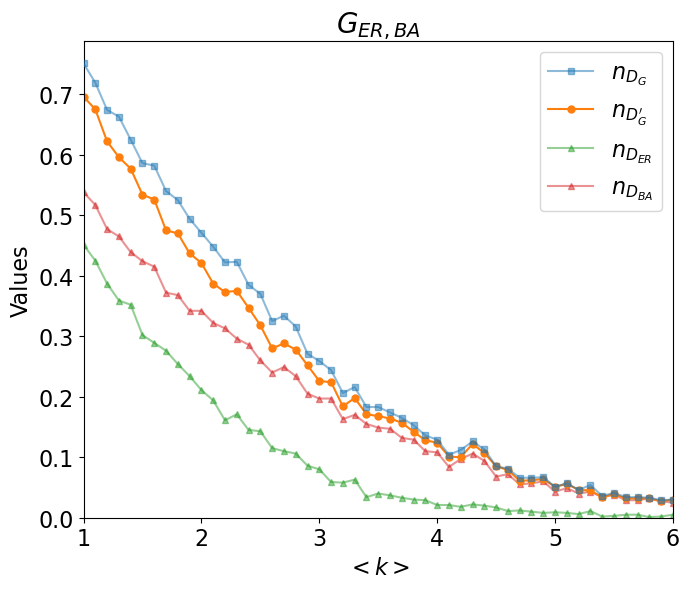

In [ ]:
shapes = ['s', 'o', '^', '^']

fig, ax = plt.subplots(figsize=(7, 6))

for j, column in enumerate(["baseline", "n_D", "n_D1", "n_D2"]):
    if column in ['n_D1', 'n_D2']:
        ax.plot(df_filtered_2['k1'], df_filtered_2[column], label=r'$n_{D_{ER}}$' if column == 'n_D1' else r'$n_{D_{BA}}$', linestyle='-', marker=shapes[j],
                markersize=5, alpha=0.5, zorder=1)
    else:
        
        if column == 'baseline':
            ax.plot(df_filtered_2['k1'], df_filtered_2[column], label=r'$n_{D_G}$', linestyle='-', marker=shapes[j],
                markersize=5, alpha=0.5, zorder=99)
        else:
            ax.plot(df_filtered_2['k1'], df_filtered_2[column], label=r"$n_{D_G'}$", linestyle='-', marker=shapes[j],
                markersize=5)

ax.set_title(r'$G_{ER, BA}$', fontsize=TITLE_FONTSIZE)
ax.set_xlabel(r'$<k>$', fontsize=TICK_FONTSIZE)
ax.set_ylabel('Values', fontsize=TICK_FONTSIZE)
ax.set_xlim(1, 6)
ax.set_ylim(0)
ax.tick_params(axis='x', labelsize=TICK_FONTSIZE)
ax.tick_params(axis='y', labelsize=TICK_FONTSIZE)
ax.legend(fontsize=LEGEND_FONTSIZE)

plt.tight_layout()
plt.savefig(f'assets/result/diff_structure_n_D1_n_D2.svg', dpi=360)
plt.show()

In [2]:
with open("assets/result/real.csv", "r", encoding="utf-8") as file:
    df = pd.read_csv(file, encoding="utf-8")
df

,Type,Subtype,Dataset,N1,N2,E1,E2,MDS1,MDS2,t_HK1,t_HK2,t_ARS1,t_ARS2,t_MSS,pre_intersection,intersection,pre_union,union
0,Biology,Genetic,Arabidopsis,6839,5239,13857,4411,4508,4679,0.141774,0.103725,0.026189,0.041654,24.613120,3086,3318,6101,5869
1,Social,Culture,Cannes,438537,438537,496982,411338,387766,382367,9.437462,11.940769,0.898248,0.991634,456.012846,348962,350866,421171,419267
2,Biology,Genetic,Celegans,3879,3879,5557,313,2885,3769,0.080811,0.051889,0.027243,0.003865,0.242300,2822,2852,3832,3802
3,Biology,Neuronal,CelegansConnectome,279,279,1031,1639,47,30,0.006831,0.010280,0.000000,0.000000,0.000975,10,18,67,59
4,Biology,Genetic,Drosophila,8206,8150,24094,3461,4653,7564,0.228646,0.154807,0.261343,0.010777,25.104642,4316,4481,7901,7736
5,Social,Science,GravitationalWaves,362086,362086,443548,170764,332214,344544,7.933849,7.527073,0.999952,0.772008,37.356212,319406,319746,357352,357012
6,Biology,Genetic,HumanHIV1,1005,1005,869,434,987,988,0.008856,0.008119,0.001949,0.000976,0.005108,978,987,997,988
7,Social,Medical,MedicalInnovation,246,246,480,565,109,73,0.002931,0.004494,0.000000,0.000000,0.001000,63,65,119,117
8,Social,Society,MLKing,327707,327707,291318,87144,294317,310055,6.633346,6.572073,0.803830,0.634894,31.509013,282340,282599,322032,321773
9,Social,Sport,MoscowAthletics,88804,88804,104959,92370,78155,81142,1.760139,1.824237,0.083197,0.233116,8.163787,72886,73106,86411,86191


In [4]:
df['n'] = df[['N1', 'N2']].max(axis=1)
df['e'] = df['E1'] + df['E2']
df['k1'] = df['E1'] / df['n']
df['k2'] = df['E2'] / df['n']
df['n_D0'] = df['pre_union'] / df['n']
df['n_D'] = df['union'] / df['n']
df['OR'] = (df['pre_union'] - df['union']) / df['pre_union']
df['sum_n_D0_n_D'] = df['n_D0'] + df['n_D']
df['percent_n_D0'] = df['n_D0'] / df['sum_n_D0_n_D'] * 100
df['percent_n_D'] = df['n_D'] / df['sum_n_D0_n_D'] * 100
df

,Type,Subtype,Dataset,N1,N2,E1,E2,MDS1,MDS2,t_HK1,...,n,e,n_D0,n_D,OR,sum_n_D0_n_D,percent_n_D0,percent_n_D,k1,k2
0,Biology,Genetic,Arabidopsis,6839,5239,13857,4411,4508,4679,0.141774,...,6839,18268,0.892089,0.858166,0.038027,1.750256,50.969089,49.030911,2.026173,0.644977
1,Social,Culture,Cannes,438537,438537,496982,411338,387766,382367,9.437462,...,438537,908320,0.960400,0.956058,0.004521,1.916459,50.113274,49.886726,1.133273,0.937978
2,Biology,Genetic,Celegans,3879,3879,5557,313,2885,3769,0.080811,...,3879,5870,0.987883,0.980150,0.007829,1.968033,50.196489,49.803511,1.432586,0.080691
3,Biology,Neuronal,CelegansConnectome,279,279,1031,1639,47,30,0.006831,...,279,2670,0.240143,0.211470,0.119403,0.451613,53.174603,46.825397,3.695341,5.874552
4,Biology,Genetic,Drosophila,8206,8150,24094,3461,4653,7564,0.228646,...,8206,27555,0.962832,0.942725,0.020883,1.905557,50.527595,49.472405,2.936144,0.421765
5,Social,Science,GravitationalWaves,362086,362086,443548,170764,332214,344544,7.933849,...,362086,614312,0.986926,0.985987,0.000951,1.972913,50.023797,49.976203,1.224980,0.471612
6,Biology,Genetic,HumanHIV1,1005,1005,869,434,987,988,0.008856,...,1005,1303,0.992040,0.983085,0.009027,1.975124,50.226700,49.773300,0.864677,0.431841
7,Social,Medical,MedicalInnovation,246,246,480,565,109,73,0.002931,...,246,1045,0.483740,0.475610,0.016807,0.959350,50.423729,49.576271,1.951220,2.296748
8,Social,Society,MLKing,327707,327707,291318,87144,294317,310055,6.633346,...,327707,378462,0.982683,0.981892,0.000804,1.964575,50.020115,49.979885,0.888959,0.265920
9,Social,Sport,MoscowAthletics,88804,88804,104959,92370,78155,81142,1.760139,...,88804,197329,0.973053,0.970576,0.002546,1.943629,50.063730,49.936270,1.181917,1.040156


In [9]:
df_copy = df.copy()
df_copy = df_copy[['Type', 'Dataset', 'n', 'k1', 'k2', 'MDS1', 'MDS2', 'pre_union', 'union', 'n_D0', 'n_D', 'OR']]
df_copy['n'] = df_copy['n'].astype(int)
df_copy['k1'] = df_copy['k1'].round(3)
df_copy['k2'] = df_copy['k2'].round(3)
df_copy['n_D0'] = df_copy['n_D0'].round(3)
df_copy['n_D'] = df_copy['n_D'].round(3)
df_copy['OR'] = df_copy['OR'].round(3)
df_copy.sort_values(by=['Type', 'Dataset'], inplace=True)
df_copy

,Type,Dataset,n,k1,k2,MDS1,MDS2,pre_union,union,n_D0,n_D,OR
0,Biology,Arabidopsis,6839,2.026,0.645,4508,4679,6101,5869,0.892,0.858,0.038
2,Biology,Celegans,3879,1.433,0.081,2885,3769,3832,3802,0.988,0.980,0.008
3,Biology,CelegansConnectome,279,3.695,5.875,47,30,67,59,0.240,0.211,0.119
4,Biology,Drosophila,8206,2.936,0.422,4653,7564,7901,7736,0.963,0.943,0.021
6,Biology,HumanHIV1,1005,0.865,0.432,987,988,997,988,0.992,0.983,0.009
12,Biology,Rattus,2640,1.142,0.414,2128,2236,2493,2428,0.944,0.920,0.026
13,Biology,SacchPomb,4092,0.412,0.099,3564,3920,4000,3973,0.978,0.971,0.007
1,Social,Cannes,438537,1.133,0.938,387766,382367,421171,419267,0.960,0.956,0.005
5,Social,GravitationalWaves,362086,1.225,0.472,332214,344544,357352,357012,0.987,0.986,0.001
8,Social,MLKing,327707,0.889,0.266,294317,310055,322032,321773,0.983,0.982,0.001


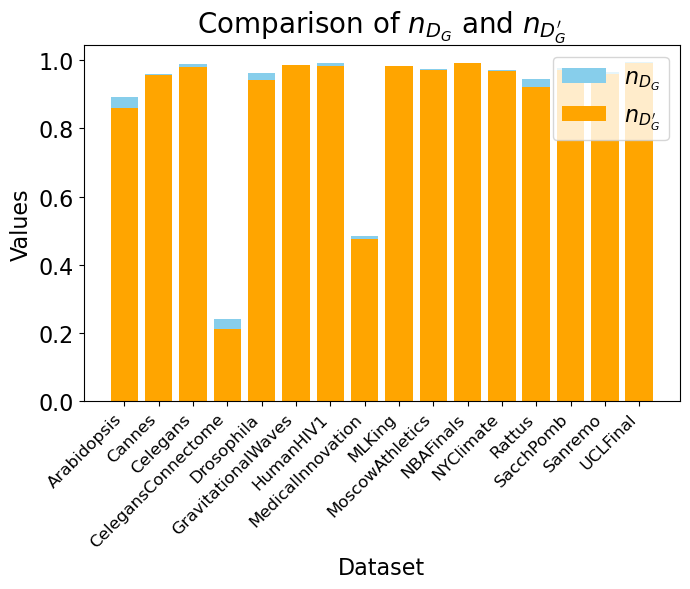

In [ ]:
# Set the figure size for better visualization
plt.figure(figsize=(7, 6))

# Plotting the bar chart
plt.bar(df['Dataset'], df['n_D0'], label=r'$n_{D_G}$', color='skyblue')
plt.bar(df['Dataset'], df['n_D'], label=r"$n_{D_G'}$", color='orange')

# Adding labels and title
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees
plt.xlabel('Dataset', fontsize=TICK_FONTSIZE)
plt.ylabel('Values', fontsize=TICK_FONTSIZE)
plt.tick_params(axis='x', labelsize=TICK_FONTSIZE - 4)
plt.tick_params(axis='y', labelsize=TICK_FONTSIZE)
plt.title(r"Comparison of $n_{D_G}$ and $n_{D_G'}$", fontsize=TITLE_FONTSIZE)
plt.legend(fontsize=LEGEND_FONTSIZE)

plt.tight_layout()
plt.savefig(f'assets/result/real_overlap.svg', dpi=360)
plt.show()

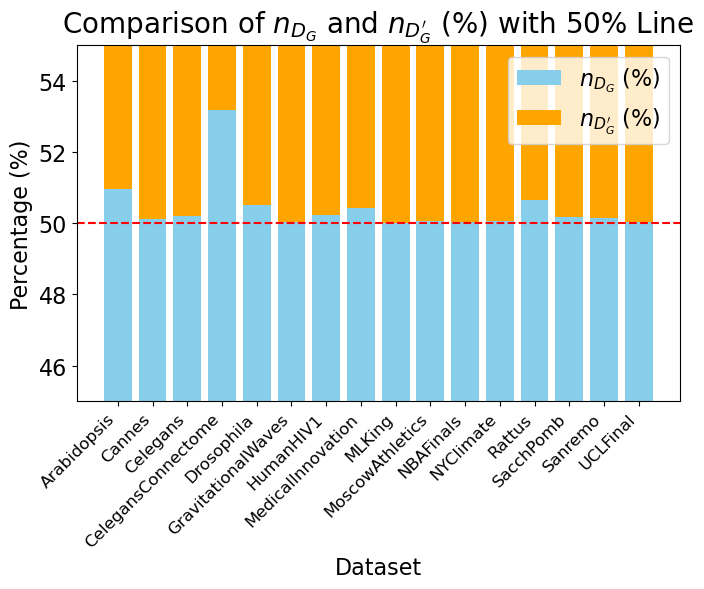

In [ ]:
# Set the figure size for better visualization
plt.figure(figsize=(7, 6))

# Plotting the stacked bar chart with percentages
plt.bar(df['Dataset'], df['percent_n_D0'], label=r'$n_{D_G}$ (%)', color='skyblue')
plt.bar(df['Dataset'], df['percent_n_D'], bottom=df['percent_n_D0'], label=r"$n_{D_G'}$ (%)", color='orange')

# Adding a dashed line at 50%
plt.axhline(y=50, color='red', linestyle='--')

# Setting y-axis limits
plt.ylim(45, 55)

# Adding labels and title
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees
plt.tick_params(axis='x', labelsize=TICK_FONTSIZE - 4)
plt.tick_params(axis='y', labelsize=TICK_FONTSIZE)
plt.xlabel('Dataset', fontsize=TICK_FONTSIZE)
plt.ylabel('Percentage (%)', fontsize=TICK_FONTSIZE)
plt.title(r"Comparison of $n_{D_G}$ and $n_{D_G'}$ (%) with 50% Line", fontsize=TITLE_FONTSIZE)
plt.legend(fontsize=LEGEND_FONTSIZE)

plt.tight_layout()
plt.savefig(f'assets/result/real_percetage.svg', dpi=360)
plt.show()

C:\Users\Niji\AppData\Local\Temp\ipykernel_19552\2930861885.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab20', len(df['Dataset']))


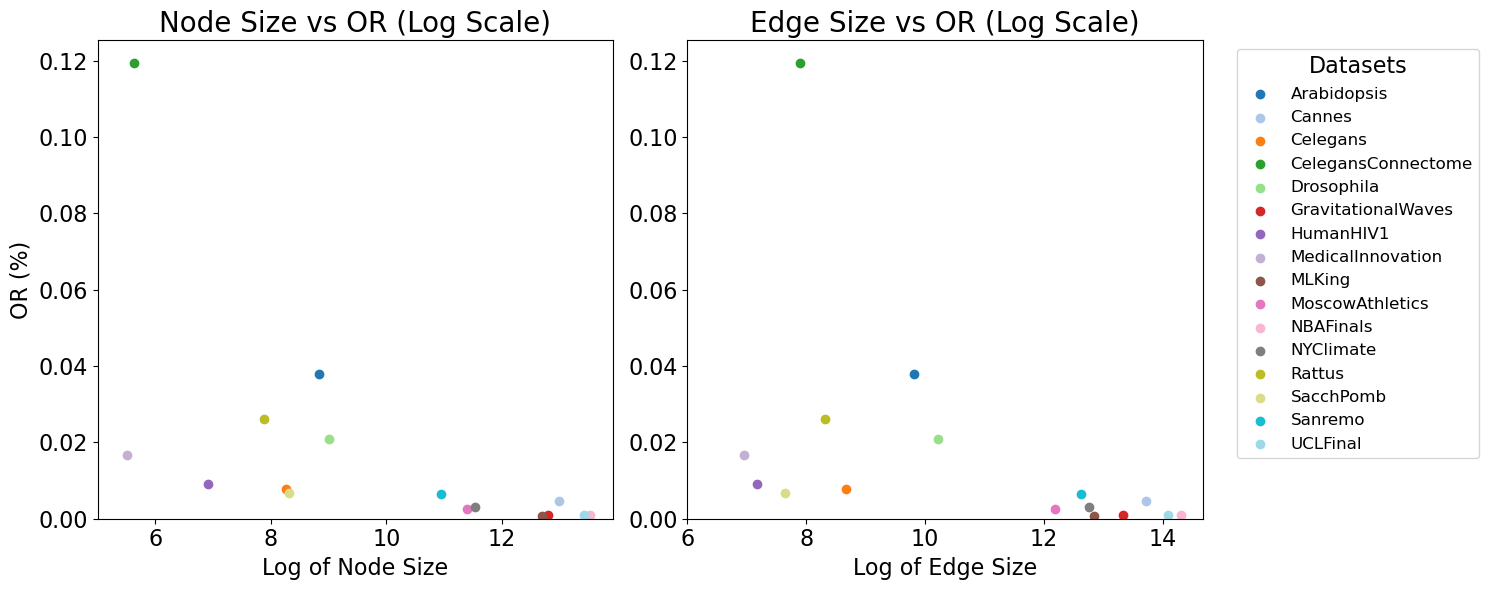

In [ ]:
# Set the figure size for better visualization
plt.figure(figsize=(15, 6))
color_map = plt.cm.get_cmap('tab20', len(df['Dataset']))

# First subplot: Node Size vs OR
plt.subplot(1, 2, 1)
for i, dataset in enumerate(df['Dataset']):
    plt.scatter(np.log(df.loc[df['Dataset'] == dataset, 'n']), 
                df.loc[df['Dataset'] == dataset, 'OR'],  # Using OR_relative as OR is not defined
                color=color_map(i), label=dataset)
plt.xlabel('Log of Node Size', fontsize=TICK_FONTSIZE)
plt.ylabel('OR', fontsize=TICK_FONTSIZE)
plt.tick_params(axis='x', labelsize=TICK_FONTSIZE)
plt.tick_params(axis='y', labelsize=TICK_FONTSIZE)
plt.xlim(5)
plt.ylim(0)
plt.title('Node Size vs OR (Log Scale)', fontsize=TITLE_FONTSIZE)

# Second subplot: Edge Size vs OR
plt.subplot(1, 2, 2)
for i, dataset in enumerate(df['Dataset']):
    plt.scatter(np.log(df.loc[df['Dataset'] == dataset, 'e'].replace(0, np.nan)), 
                df.loc[df['Dataset'] == dataset, 'OR'],  # Using OR_relative as OR is not defined
                color=color_map(i), label=dataset)
plt.xlabel('Log of Edge Size', fontsize=TICK_FONTSIZE)
plt.tick_params(axis='x', labelsize=TICK_FONTSIZE)
plt.tick_params(axis='y', labelsize=TICK_FONTSIZE)
plt.xlim(6)
plt.ylim(0)
plt.title('Edge Size vs OR (Log Scale)', fontsize=TITLE_FONTSIZE)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=LEGEND_FONTSIZE - 4, title="Datasets", title_fontsize=LEGEND_FONTSIZE)

plt.tight_layout()
plt.savefig(f'assets/result/real_size.svg', dpi=360)
plt.show()